# Machi Koro AI - By Cain Soltoff

### I'm currently working on training a neural network on top of my base python implementation of Machi Koro.

### For now here are some stats from using AI players that make random decisions (i.e. cards to buy (or pass), players to take money from if given a choice, whether to roll one or two dice).  The one exception is that it prioritizes constructing landmarks if it can afford them.

In [1]:
from MachiKoro.GameController import GameController
from MachiKoro.GameController import game_db
from MachiKoro.PlayerController import RandomAIPlayerController, HumanPlayerController

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

In [2]:
turns_to_complete = []
victor_player = []
victor_card_set = []

game = GameController(num_players=3, print_actions=False)

game.add_player_controller(RandomAIPlayerController(game))
game.add_player_controller(RandomAIPlayerController(game))
game.add_player_controller(RandomAIPlayerController(game))

num_sims = 10000

for i in range(num_sims):
    if i % 1000 == 0:
        print("Simulations Completed:", i)
    game.run_game()
    turns_to_complete.append(game.turn_num)
    victor_player.append(game.player_turn)
    victor_card_set.append(game.players[game.player_turn]['player_cards'])
    game.reset()
print("Done Simulating")

Simulations Completed: 0
Simulations Completed: 1000
Simulations Completed: 2000
Simulations Completed: 3000
Simulations Completed: 4000
Simulations Completed: 5000
Simulations Completed: 6000
Simulations Completed: 7000
Simulations Completed: 8000
Simulations Completed: 9000
Done Simulating


[]

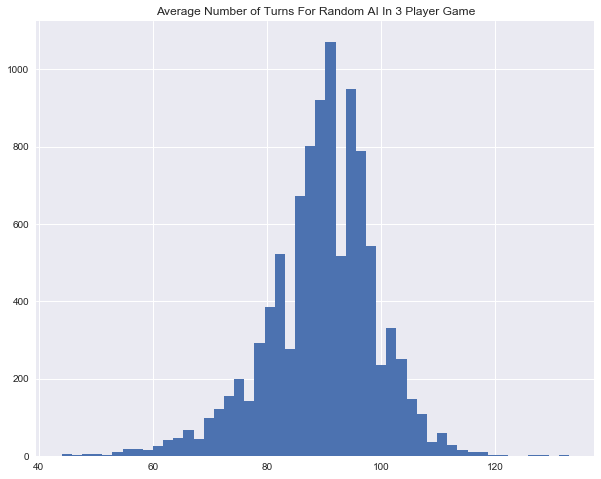

In [3]:
plt.figure(figsize=(10,8))
plt.hist(turns_to_complete, bins=50)
plt.title("Average Number of Turns For Random AI In 3 Player Game")
plt.plot()

[]

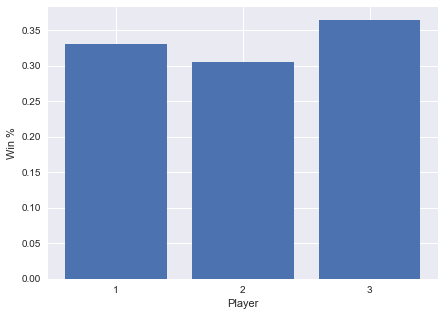

In [4]:
from collections import Counter
c = Counter(victor_player)
plt.figure(figsize=(7,5))
plt.bar(x=[1, 2, 3],height=[freq/num_sims for i,freq in c.items()])
plt.xticks([1, 2, 3])
plt.xlabel("Player")
plt.ylabel("Win %")
plt.plot()

[]

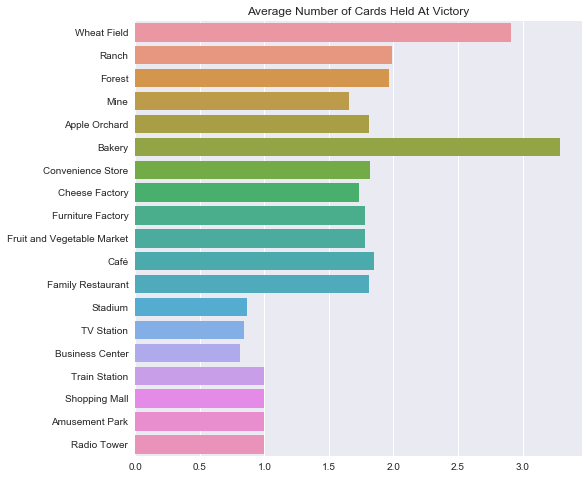

In [5]:
victor_card_freq = np.zeros(19)
for (i, vcs) in enumerate(victor_card_set):
    victor_card_freq += np.array(vcs)

plt.figure(figsize=(8,8))

card_names = [card["card_name"] for card in game_db["card_props"]]
sns.barplot(y=card_names,x=victor_card_freq/num_sims, orient="h")
plt.title("Average Number of Cards Held At Victory")
plt.plot()

[]

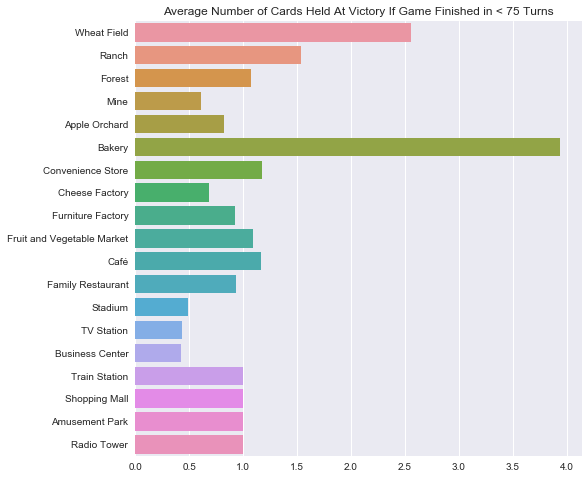

In [6]:
victor_card_freq = np.zeros(19)

subset_of_games = 0

for (i, vcs) in enumerate(victor_card_set):
    if(turns_to_complete[i] < 66):
        victor_card_freq += np.array(vcs)
        subset_of_games += 1

plt.figure(figsize=(8,8))

card_names = [card["card_name"] for card in game_db["card_props"]]
sns.barplot(y=card_names,x=victor_card_freq/subset_of_games, orient="h")
plt.title("Average Number of Cards Held At Victory If Game Finished in < 75 Turns")
plt.plot()